<a href="https://colab.research.google.com/github/DIWAKAR-V/Online_Retail_Sales_Segmentation/blob/main/Unsupervised_ML_Online_retail_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [52]:
#Importing the libraries
#Data Wrangling
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Model Building Prerequisits
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Evaluation Metrics
from sklearn.metrics import silhouette_score, silhouette_samples

#To getSilhouette Visualization
from yellowbrick.cluster import SilhouetteVisualizer

#Models used
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

#To get clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage

import warnings
warnings.filterwarnings('ignore')

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
#loading dataset
data=pd.read_csv("/content/drive/MyDrive/unsupervised ml project/Online Retail.xlsx - Online Retail.csv")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [55]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [56]:
data.shape

(541909, 8)

###**Shape of our dataset is (541909, 8) that means we have 541909 number of rows and 8 columns**

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [58]:
len(data[data.duplicated()])

5268

In [59]:
#dropping duplicates
data.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [60]:
#checking for null values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [61]:
data[["Description","CustomerID"]].isnull().sum()/len(data)*100

Description     0.268311
CustomerID     24.926694
dtype: float64

In [62]:
data.dropna(inplace=True)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [64]:
data.loc[data["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [65]:
data=data[data["Quantity"]>0]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [66]:
data["InvoiceNo"].astype("int")

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 397924, dtype: int64

In [67]:
data['TotalAmount']=data['Quantity']*data['UnitPrice']
data['TotalAmount']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalAmount, Length: 397924, dtype: float64

In [68]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [69]:
#Extracting the Year
data["Year"] = data["InvoiceDate"].apply(lambda x: x.year)

#Extracting the Month Name
data['Month'] = data["InvoiceDate"].apply(lambda x: x.month_name())

#Extracting the Month Number
data['MonthNum'] = data["InvoiceDate"].apply(lambda x: x.month)

#Extracting the Day Name
data['Day'] = data["InvoiceDate"].apply(lambda x: x.day_name())

#Extracting the Day Number
data["DayNum"] = data["InvoiceDate"].apply(lambda x: x.day)

#Extracting the Hour
data["Hour"] = data["InvoiceDate"].apply(lambda x: x.hour)

#Extracting the Minute
data["Minute"] = data["InvoiceDate"].apply(lambda x: x.minute)

In [70]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,MonthNum,Day,DayNum,Hour,Minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,12,Wednesday,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,12,Wednesday,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,12,Wednesday,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,12,Wednesday,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,12,Wednesday,1,8,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,December,12,Friday,9,12,50
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,December,12,Friday,9,12,50
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,December,12,Friday,9,12,50
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,December,12,Friday,9,12,50


In [71]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
TotalAmount,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60
Year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
MonthNum,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
DayNum,397924.0,15.042181,8.653771,1.0,7.00,15.00,22.00,31.00
Hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Minute,397924.0,30.408013,17.078163,0.0,16.00,31.00,45.00,59.00


In [72]:
#number of rows containing countries data
number_of_rows_countries = data["Country"].value_counts().reset_index()
number_of_rows_countries

,index,Country
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1842
8,Portugal,1462
9,Australia,1185


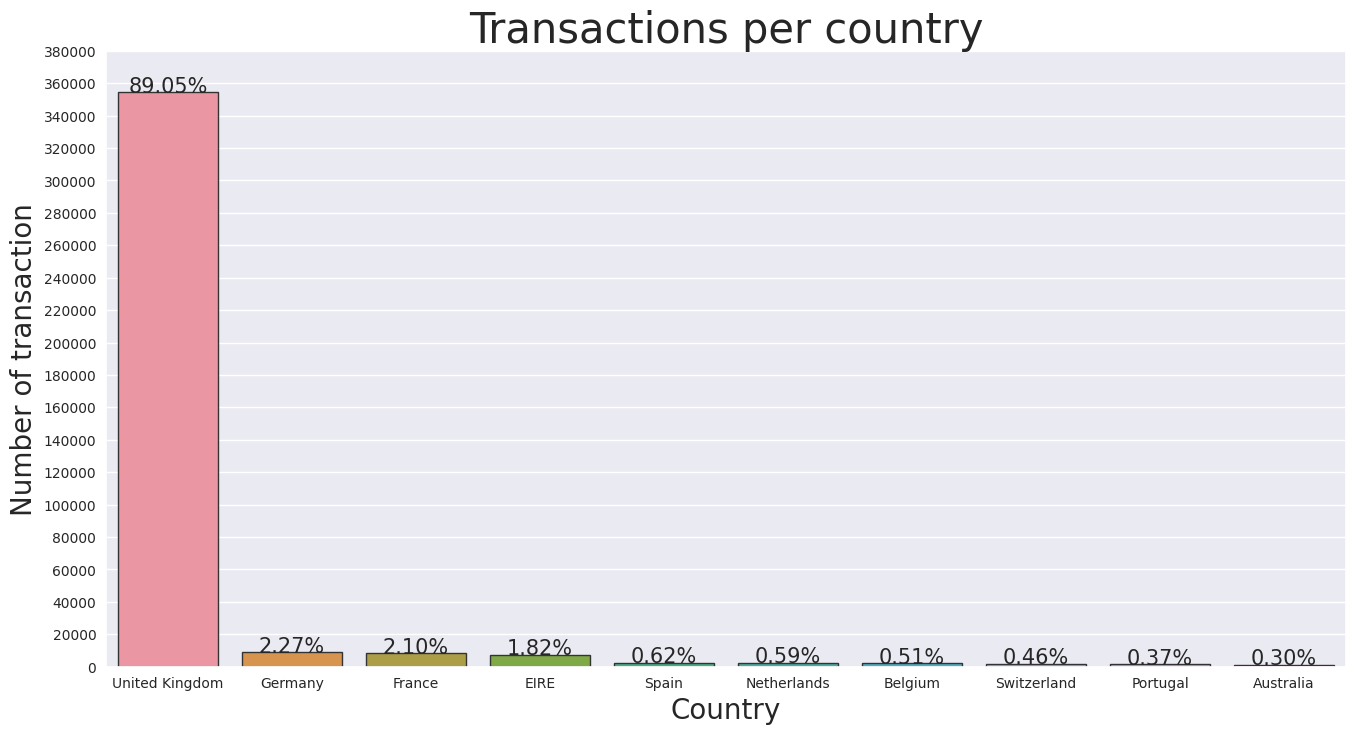

In [73]:
# plot sales for top 10 counties
country_data = data.groupby('Country').count().reset_index()
country_data.sort_values('InvoiceNo', ignore_index=True, ascending=False, inplace=True)
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(data=country_data[0:10], x='Country', y='InvoiceNo', ax=axes, linewidth=1, edgecolor='0.2')
axes.set_yticks(range(0,400000,20000))
axes.set_xlabel('Country', size=20)
axes.set_ylabel('Number of transaction', size=20)
axes.set_title('Transactions per country', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for p in axes.patches:
    height = p.get_height()
    axes.text(p.get_x()+p.get_width()/2, height+100, '{:1.2f}''%'.format(height/data.shape[0]*100),ha = "center", fontsize = 15)

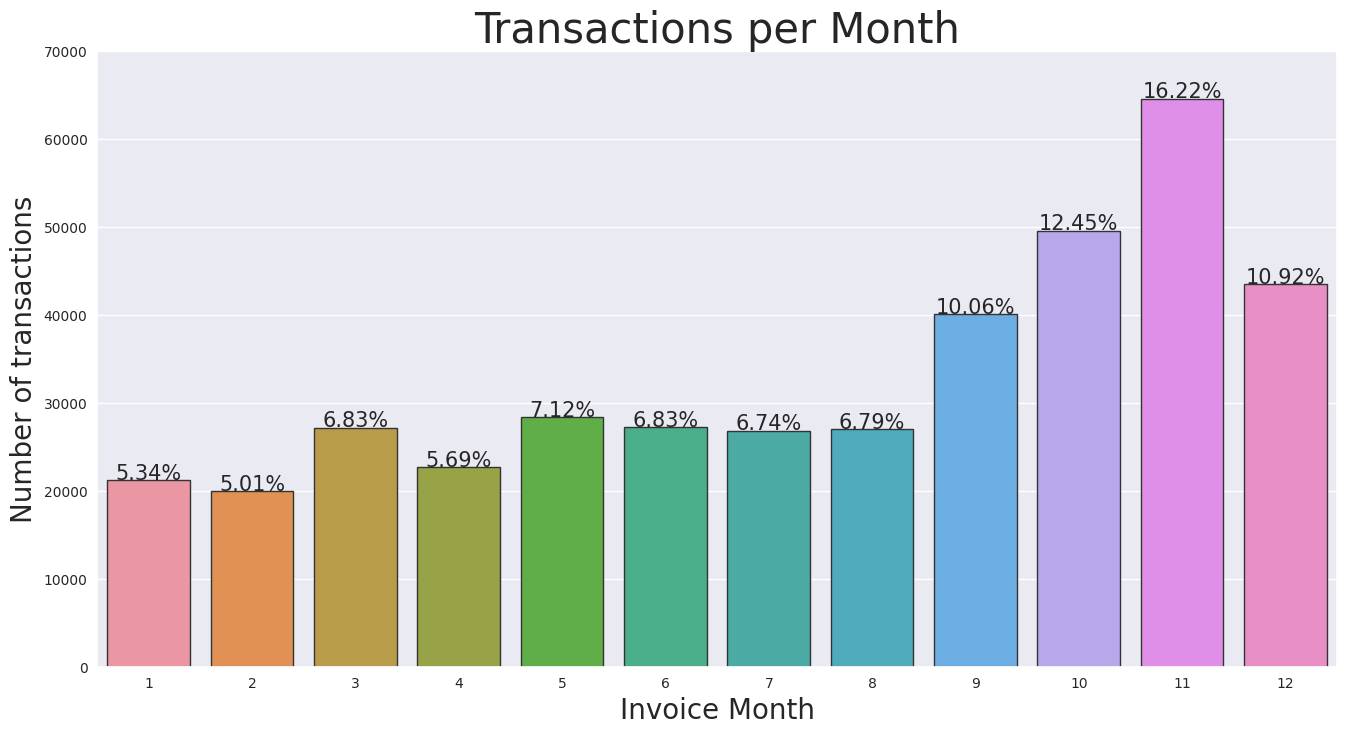

In [74]:
# plot transaction for year and month
month_data = data.groupby('MonthNum').count().reset_index()
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(data=month_data, x='MonthNum', y='InvoiceNo', ax=axes, linewidth=1, edgecolor='0.2')
axes.set_yticks(range(0,80000,10000))
axes.set_xlabel('Invoice Month', size=20)
axes.set_ylabel('Number of transactions', size=20)
axes.set_title('Transactions per Month', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for p in axes.patches:
    height = p.get_height()
    axes.text(p.get_x()+p.get_width()/2, height+100, '{:1.2f}''%'.format(height/data.shape[0]*100),ha = "center", fontsize = 15)

In [75]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [76]:
data['Time_type']=data['Hour'].apply(time_type)

<Axes: title={'center': 'Time_type'}, xlabel='Time_type', ylabel='count'>

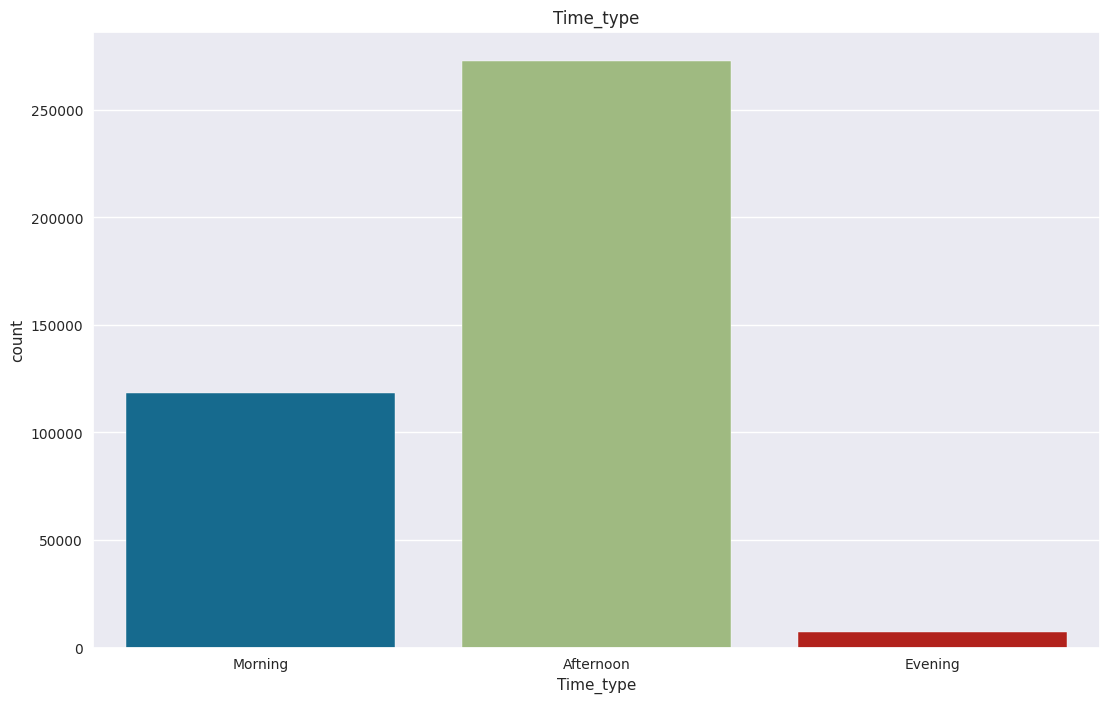

In [77]:
plt.figure(figsize=(13,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=data)

In [78]:
# Top 10 products name which were repeatedly sold
product_data = data['Description'].value_counts().reset_index()
product_data.rename(columns={'index': 'Description_Name','Description': 'Count'}, inplace=True)
product_data[:10]

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(3, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(4, 0, 'PARTY BUNTING'),
  Text(5, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(6, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(7, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(8, 0, 'POSTAGE'),
  Text(9, 0, 'PACK OF 72 RETROSPOT CAKE CASES')])

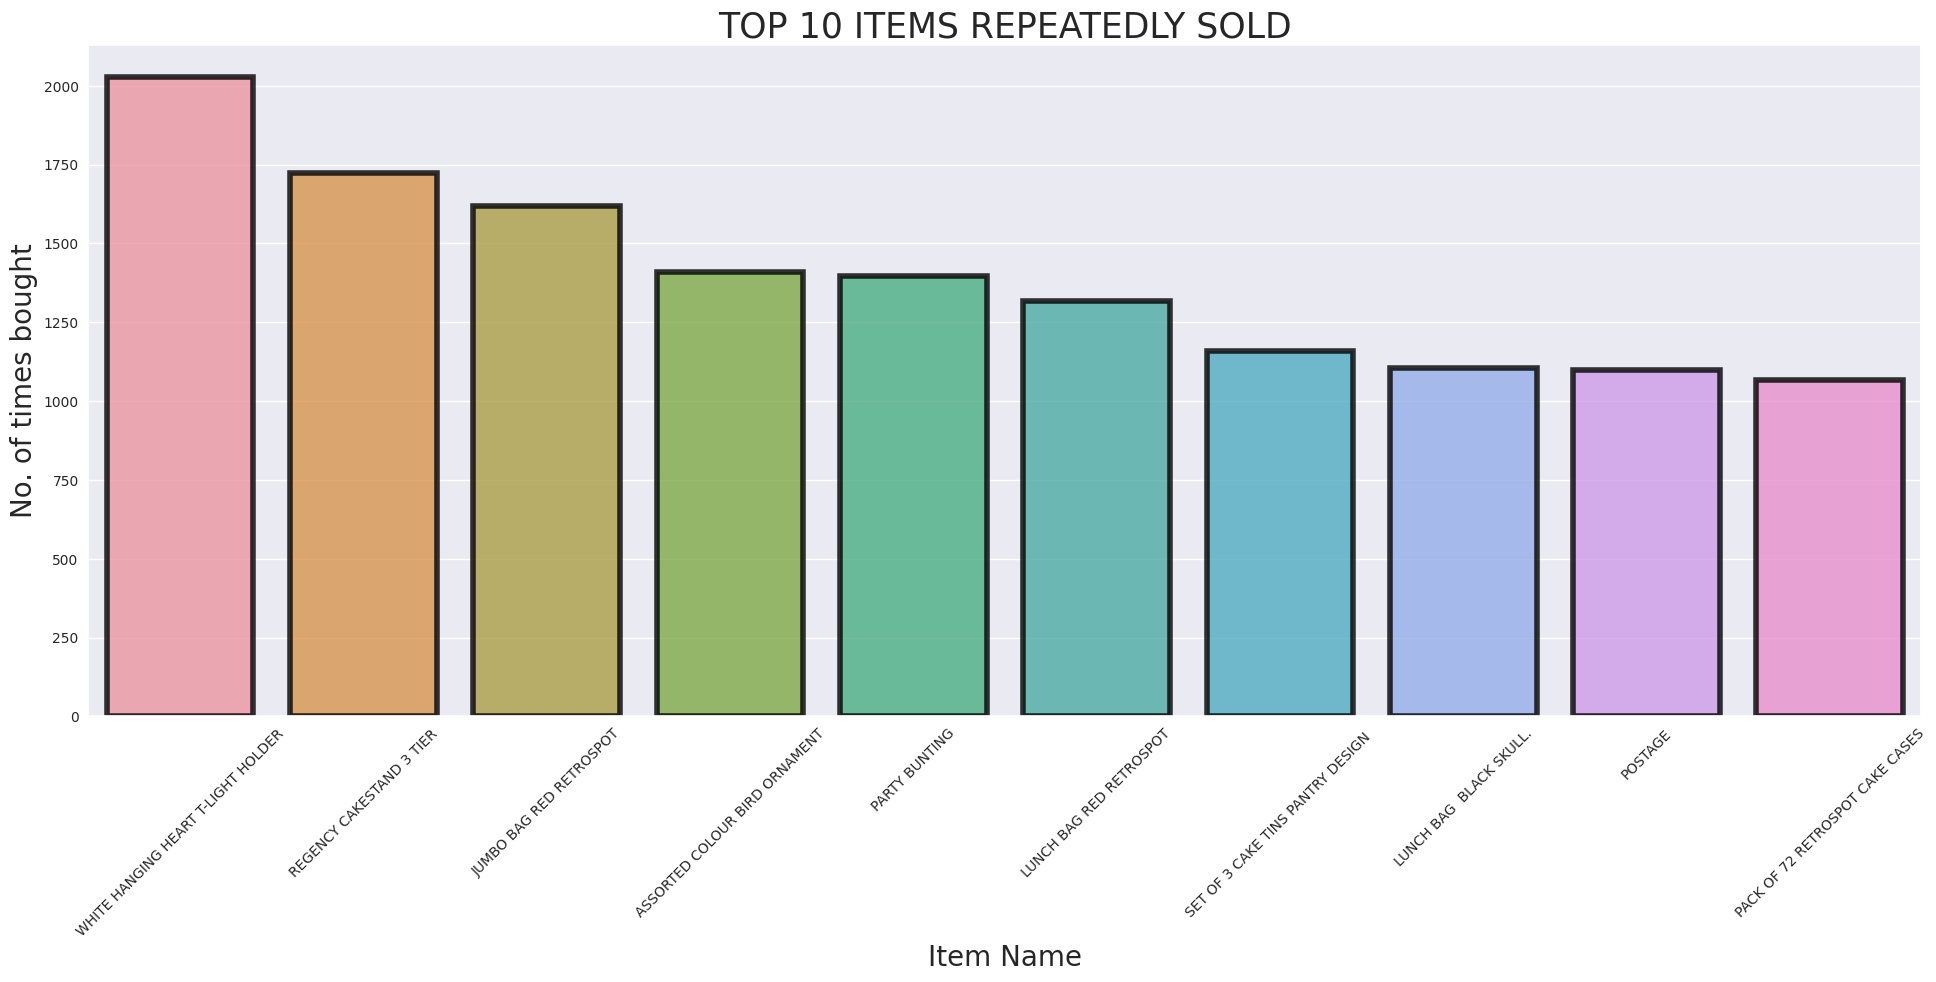

In [79]:
# Barplot of the top 10 most repeatedly sold items
plt.figure(figsize=(20,8))
sns.barplot(x='Description_Name',y='Count',data = product_data[:10],alpha=0.8,edgecolor = 'black',lw =4)
plt.xlabel('Item Name', fontsize = 20)
plt.ylabel('No. of times bought', fontsize = 20)
plt.title('TOP 10 ITEMS REPEATEDLY SOLD', fontsize= 25)
plt.tight_layout()
plt.xticks(rotation = 45)   # by using xticks we rotate our column labels to 90 degree.

#**Create the RFM model (Recency, Frequency,Monetary value)**

###Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on

###Performing RFM Segmentation and RFM Analysis, Step by Step
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. ...
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.

##Recency = Latest Date - Last Inovice Data
##Frequency = count of invoice no. of transaction(s),
##Monetary = Sum of Total

In [80]:
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_data = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_data['InvoiceDate'] = rfm_data['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_data.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_data.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


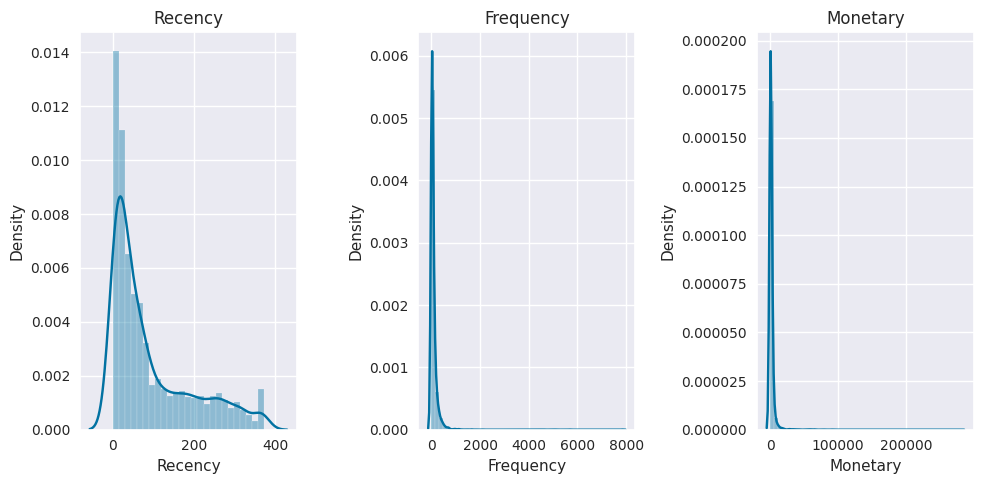

In [81]:
cols = ['Recency', 'Frequency',	'Monetary']

#Plotting the distribution
plt.figure(figsize=(10,5))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(rfm_data[col])
  plt.title(col.title())
  plt.tight_layout()

In [82]:
#Applying quantile cut method to saperate the column values based on their quantiles and assign labels
rfm_data['R'] = pd.qcut(rfm_data['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm_data['F'] = pd.qcut(rfm_data['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm_data['M'] = pd.qcut(rfm_data['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

#Viewing the RFM data
rfm_data.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


In [83]:
rfm_data.isnull().sum()

Recency      0
Frequency    0
Monetary     0
R            0
F            0
M            0
dtype: int64

We can see that the 'Quantity', 'UnitPrice', 'TotalAmount' are all positively skewed.(mean > median > mode).

Ideally we these features must be symmetric.(mean = median = mode)

For this we must apply some kind of transformation to make these distributions close symmetric.

Here, we will encorporate logarithmic transformation.

In [84]:
#Replacing all the zero values to 1 to run the transformation without a hassle
rfm_data.replace(0.0,1,inplace=True)

#Applying Log transformation
rfm_data['Recency_Log']   = rfm_data['Recency'].apply(np.log)
rfm_data['Frequency_Log'] = rfm_data['Frequency'].apply(np.log)
rfm_data['Monetary_Log']  = rfm_data['Monetary'].apply(np.log)

#Viewing the RFM data
rfm_data.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Recency_Log,Frequency_Log,Monetary_Log
0,12346.0,325,1,77183.60,1,1,4,5.783825,0.000000,11.253942
1,12347.0,2,182,4310.00,4,4,4,0.693147,5.204007,8.368693
2,12348.0,75,31,1797.24,2,2,4,4.317488,3.433987,7.494007
3,12349.0,18,73,1757.55,3,3,4,2.890372,4.290459,7.471676
4,12350.0,310,17,334.40,1,1,2,5.736572,2.833213,5.812338


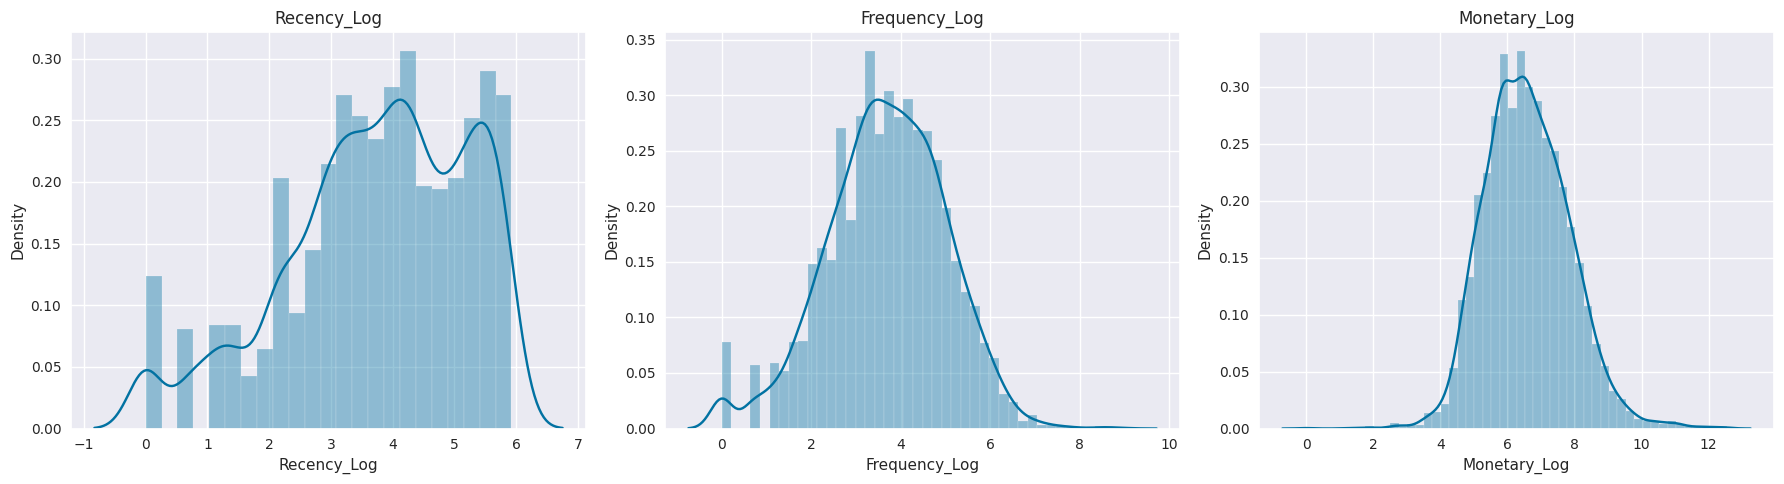

In [85]:
#Columns to analyse distribution
cols = ['Recency_Log', 'Frequency_Log',	'Monetary_Log']

#Plotting the distribution
plt.figure(figsize=(18,5))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(rfm_data[col])
  plt.title(col.title())
  plt.tight_layout()

Text(0.5, 0, 'Monetary')

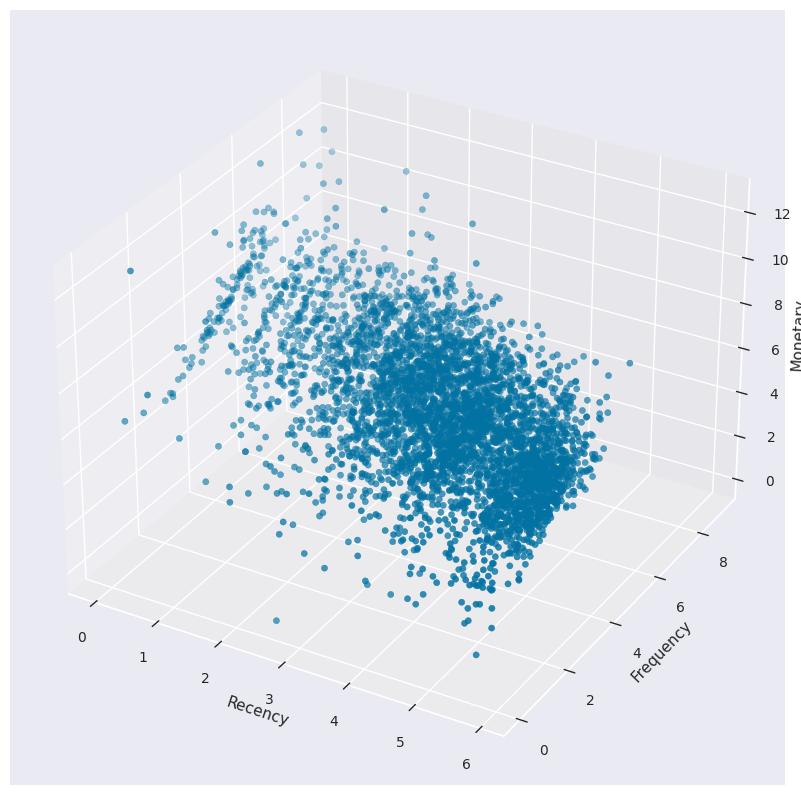

In [86]:
# plot data points in 3D space
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
x = rfm_data['Recency_Log']
y =rfm_data['Frequency_Log']
z = rfm_data['Monetary_Log']
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')


In [87]:
x=rfm_data[["Recency_Log",'Frequency_Log',"Monetary_Log"]]
x

,Recency_Log,Frequency_Log,Monetary_Log
CustomerID,,,
12346.0,5.783825,0.000000,11.253942
12347.0,0.693147,5.204007,8.368693
12348.0,4.317488,3.433987,7.494007
12349.0,2.890372,4.290459,7.471676
12350.0,5.736572,2.833213,5.812338
...,...,...,...
18280.0,5.624018,2.302585,5.196285
18281.0,5.192957,1.945910,4.392224
18282.0,1.945910,2.484907,5.182064


In [88]:
#Fitting StandardScalar on the feature matrix to standardise the data
x = StandardScaler().fit_transform(x)

In [89]:
#Empty dictionary to store the stats and summary for all achieved segments
conclusion={}

#Function to remove the outliers
def cap_outliers(col,overlap_supress):
  '''
    Takes a column and removes the outliers based on the overlap_supress value
    col: column to be cleaned
    overlap_supress: value to be used to remove the outliers
    Type:
    col: pandas.Series
    overlap_supress: float

    Returns:Capped column with outliers removed
  '''
  condition1=col < col.quantile(1-overlap_supress)
  condition2=col > col.quantile(overlap_supress)
  return col[condition1 & condition2]

#Function for displaying the stats of Recency, Frequency and Monetary for each group of segments
def cluster_stats(data, segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame
    Features:This function prints the mean median and count of Recency, Frequency and Monetary for each group
    This function prints 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  '''
  #Storing the mean median and count of Recency, Frequency and Monetary for each group of segments
  stats = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(['mean','median'])
  stats['Count'] = data[segment_name].value_counts()

  #Storing 25% and 75% Quantile of Recency, Frequency and Monetary for each group of segments
  summary = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg({
          "Recency"   :lambda x : f'{int(x.quantile(0.25))} to {int(x.quantile(0.75))} days ago',
          "Frequency" :lambda x : f"{int(x.quantile(0.25))} to {int(x.quantile(0.75))} times",
          "Monetary"  :lambda x : f"{int(x.quantile(0.25))} to {int(x.quantile(0.75))} Sterling"})

  #Changing the name for the columns
  stats.columns = [f'{i}_{j}' for i, j in stats.columns]
  summary.columns=['Last_Transaction','Transaction_frequency','Transaction_Value']

  return stats, summary

#Function for plotting clusters for Visualization
def plots_stats_summary(y, segment_name, title, overlap_supress=0.2):
  '''
  Arguments:
    Type:y: pandas.Series
    Type:title: str
    Type:segment_name: str
    Type:overlap_supress: float
  Returns: Array of DataFrames
  features:This function plots the clusters for the given data and returns the dataframes for the clusters with conclusions and stats
  '''
  rfm_data[segment_name] = y                                               # Copying segment values to main data frame
  groups = sorted(rfm_data[segment_name].unique())                         # store legends for features.
  # Calling the cluster_stats Function and saving outputs into variable
  stats, summary = cluster_stats(rfm_data,segment_name)

  # PART 1 : Visyualizing the scatter plots for all clusters
  plt.figure(figsize = (18, 6), dpi=90)                               # Setting the size of the figure
  ax = plt.axes(projection ="3d")                                     # initializing axes
  ax.set_xlabel('Recency', fontweight ='bold')                        # Setting X label
  ax.set_ylabel('Frequency', fontweight ='bold')                      # Setting Y label
  ax.set_zlabel('Monetary', fontweight ='bold')                       # Setting Z label
  ax.set_title(title, fontweight ='bold')                             # Setting main title
  ax = ax.scatter(x[:, 0], x[:, 1], x[:, 2] ,c=y, cmap='viridis')     # Plotting scatter plot in 3 dimensions
  plt.legend(*ax.legend_elements(),prop={'size': 15})                 # positioning legend

  # PART 2 : Plotting the distribution
  fig,ax = plt.subplots(3,figsize=(18, 18), dpi=90)                  # Setting the size of the figure
  # Running a for loop for iterating through the number of clusters
  for i in groups:
    # Running a for loop for iterating through columns
    for index, col in enumerate(["Recency", "Frequency", "Monetary"]):
      # Plotting distributions of Recency, Frequency and Monetary
      sns.distplot(cap_outliers(rfm_data[rfm_data[segment_name]==i][col], overlap_supress),ax=ax[index] ,kde_kws=dict(linewidth=5))
      ax[index].set_title(f'{col} Distribution', fontweight ='bold')  # Setting the main title
      ax[index].legend(groups,prop={'size': 15})                      # Assiging legends for all the axes
  plt.show()

  # PART 3 : # Displaying the stats and summary
  # Displaying the mean median and count of Recency, Frequency and Monetary for each group
  print('\n\nDiscriptive Statistics for each segment:\n')
  display(stats.reset_index().style.hide_index().background_gradient())
  print('\n\nCluster Discription:\n')
  display(summary.reset_index().style.set_properties(**{'text-align': 'left'}).hide_index().background_gradient())

  return stats, summary

In [90]:
#Getting RFM groups
rfm_data['RFM_Group'] = rfm_data.R.map(str) + rfm_data.F.map(str) + rfm_data.M.map(str)

#Getting RFM scores
rfm_data['RFM_Score'] = rfm_data[['R', 'F', 'M']].sum(axis = 1)

#Viewing the RFM data
rfm_data.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Recency_Log,Frequency_Log,Monetary_Log,RFM_Group,RFM_Score
0,12346.0,325,1,77183.60,1,1,4,5.783825,0.000000,11.253942,114,6
1,12347.0,2,182,4310.00,4,4,4,0.693147,5.204007,8.368693,444,12
2,12348.0,75,31,1797.24,2,2,4,4.317488,3.433987,7.494007,224,8
3,12349.0,18,73,1757.55,3,3,4,2.890372,4.290459,7.471676,334,10
4,12350.0,310,17,334.40,1,1,2,5.736572,2.833213,5.812338,112,4


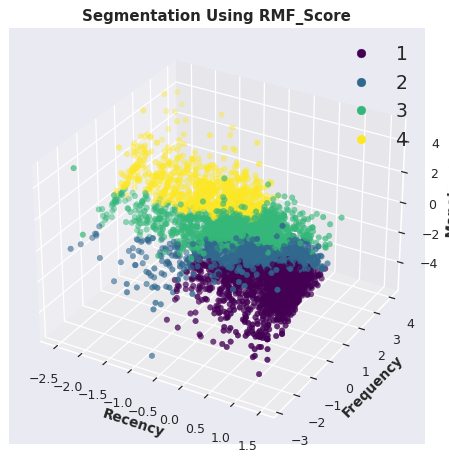

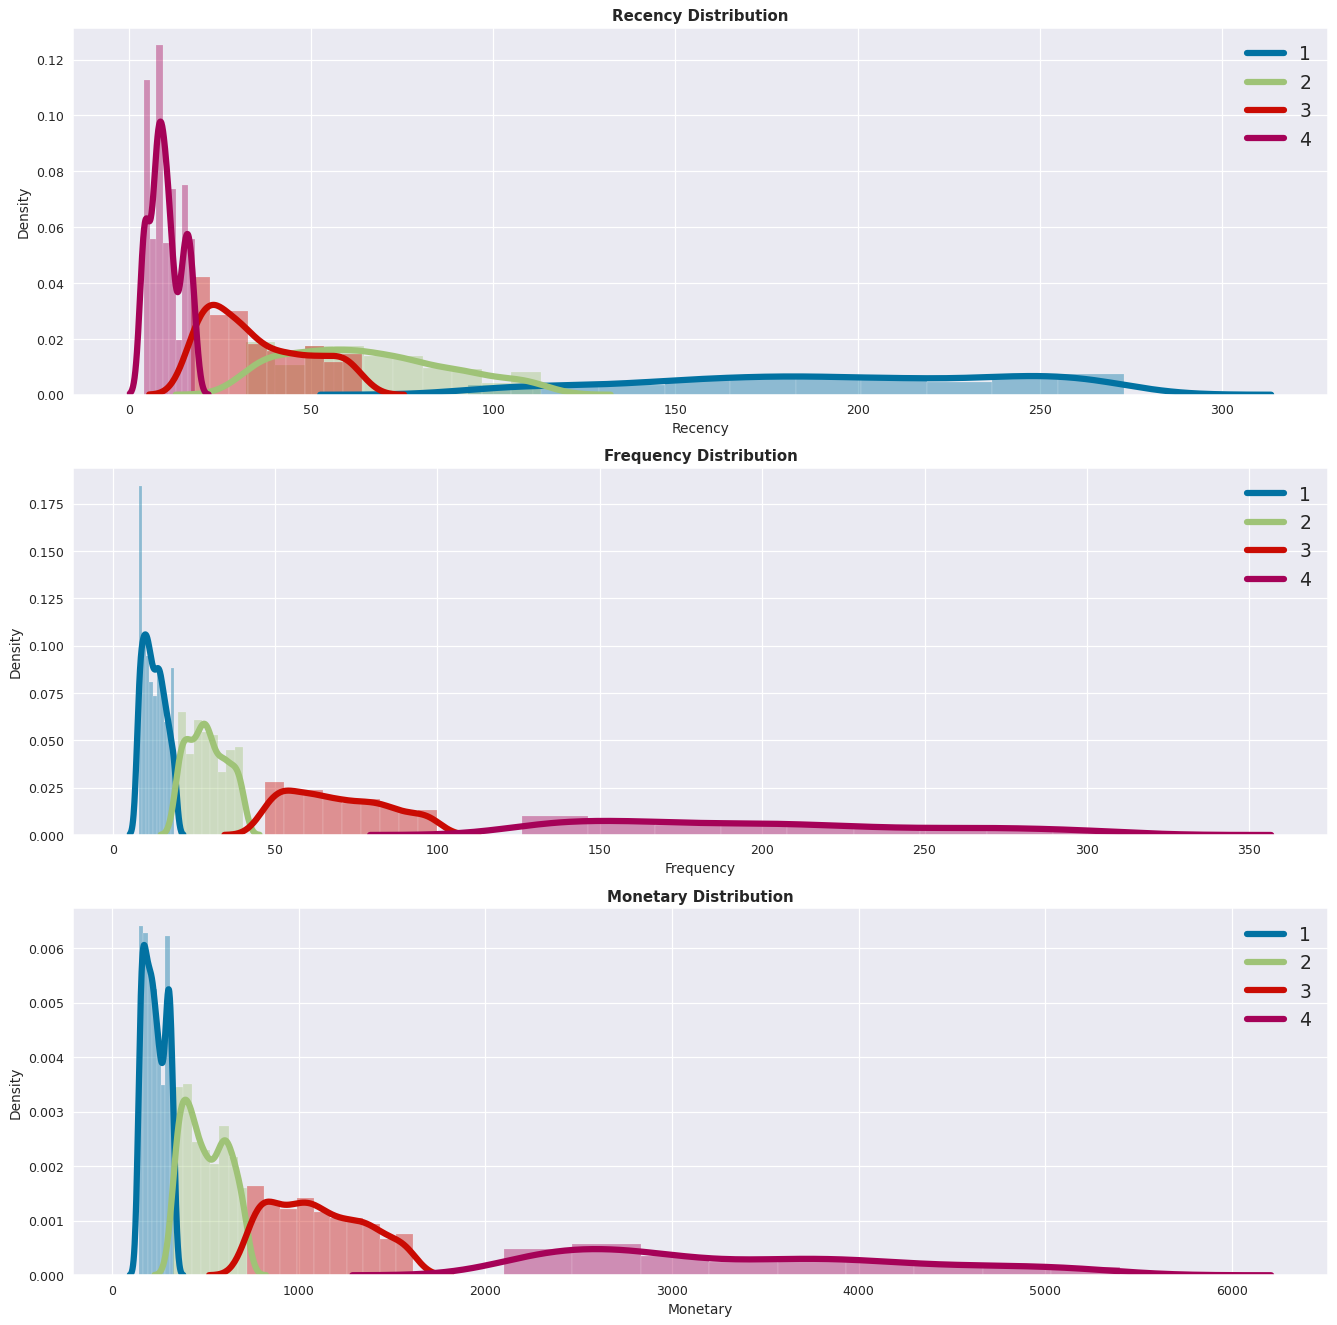



Discriptive Statistics for each segment:



RMF,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
1,191.569542,196.000000,15.132867,12.000000,267.253381,225.900000,1287
2,87.479826,63.000000,33.273719,29.000000,791.627417,491.860000,917
3,47.409231,31.000000,82.658462,67.000000,1603.897602,1080.210000,1300
4,13.176048,9.000000,288.000000,192.000000,6893.969557,3174.320000,835




Cluster Discription:



RMF,Last_Transaction,Transaction_frequency,Transaction_Value
1,92 to 274 days ago,7 to 20 times,143 to 335 Sterling
2,31 to 114 days ago,19 to 41 times,329 to 725 Sterling
3,16 to 65 days ago,46 to 101 times,725 to 1613 Sterling
4,3 to 19 days ago,125 to 312 times,2099 to 5405 Sterling


In [91]:
#Getting 4 clusters using RFM_Score
y = pd.qcut(rfm_data['RFM_Score'], q=4, labels=[1,2,3,4]).astype(int)

#Plotting the Results
title = 'Segmentation Using RMF_Score'
segment_name = 'RMF'
overlap_supress = 0.25
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

#**K-Means Clustering - Elbow Method**

In [92]:
# calculate Elbow method scores
sse = {} # sum of squared errors
# use cluster from range 1 to 20
for k in range(1, 21):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit KMeans on the dataset
    kmeans.fit(x)
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_ # Used for Plotting the elbow plot

<Axes: title={'center': 'The Elbow Method'}, xlabel='k', ylabel='Sum of squared errors'>

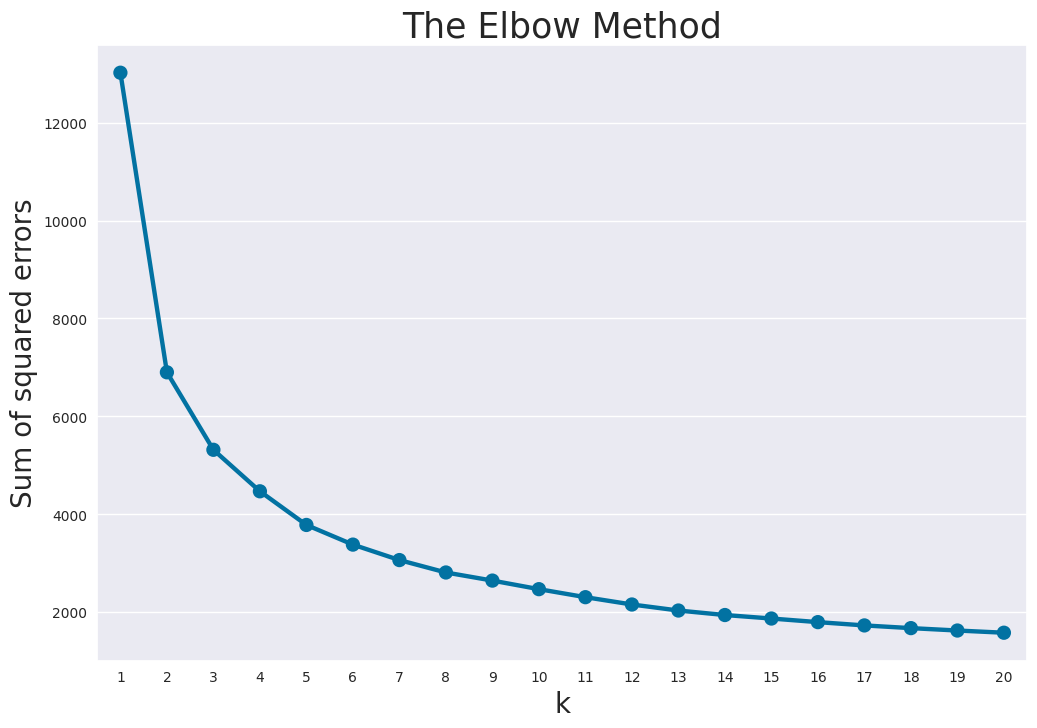

In [93]:
# the elbow plot
plt.figure(figsize=(12,8))
plt.title('The Elbow Method', size=25)
plt.xlabel('k', size=20);
plt.ylabel('Sum of squared errors', size=20)
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

We can see that error is decreasing as K increases. For values of k at 4 or 5 slope of the curve is decreasing very fast this means errors do not decrease much faster as the increase in number of clusters.

These clusters represent customer segmentation and to utilize these segmentations company needs to invent new policies for each segment. So, increase in customer segment cause extra cost for compy for implementation of new policies so very large value of k is not desirable.

We can keep value of k=4.

#Applying Silhouette Score Method:

### Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* ### Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* ### Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

### The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

For n_clusters = 2 The average silhouette_score is : 0.39512408652812586
For n_clusters = 3 The average silhouette_score is : 0.30299256612066194
For n_clusters = 4 The average silhouette_score is : 0.3025088099168961
For n_clusters = 5 The average silhouette_score is : 0.2786359548616651
For n_clusters = 6 The average silhouette_score is : 0.278829909720231
For n_clusters = 7 The average silhouette_score is : 0.26108884888042133
For n_clusters = 8 The average silhouette_score is : 0.26658999335493144


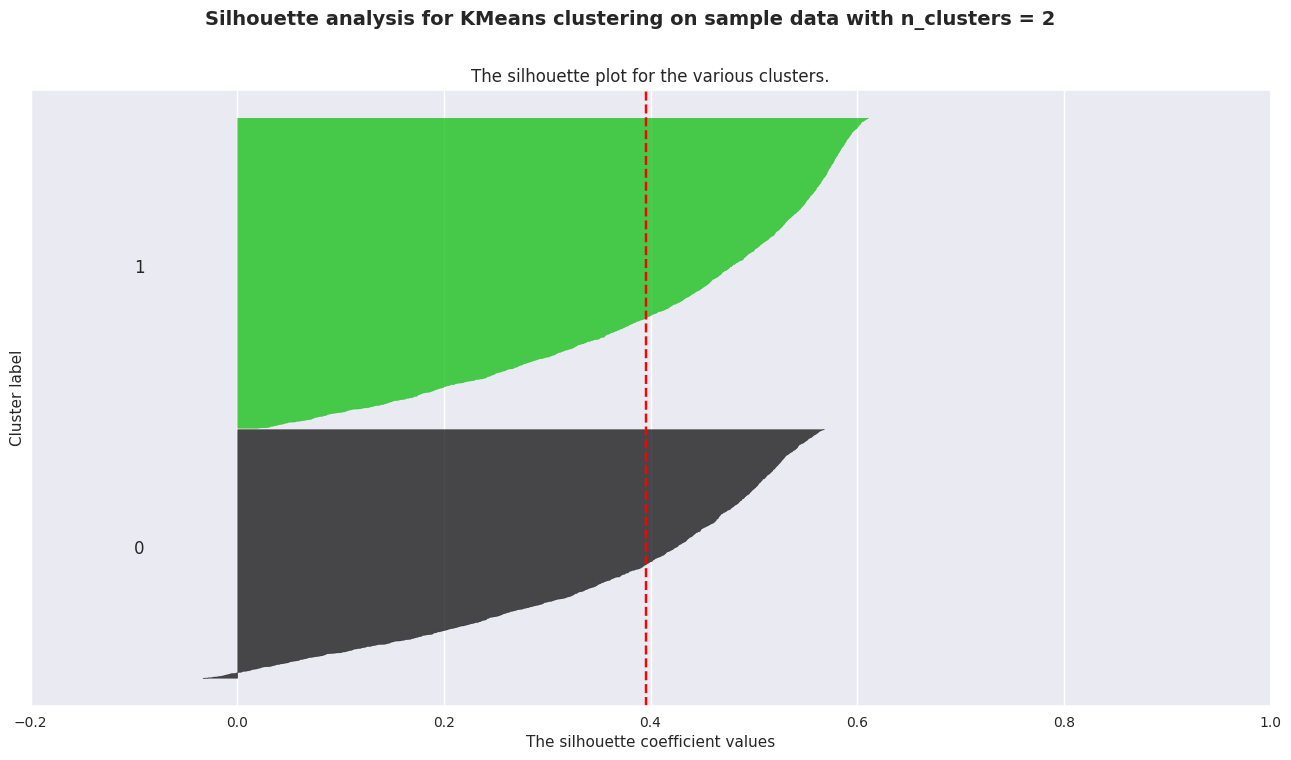

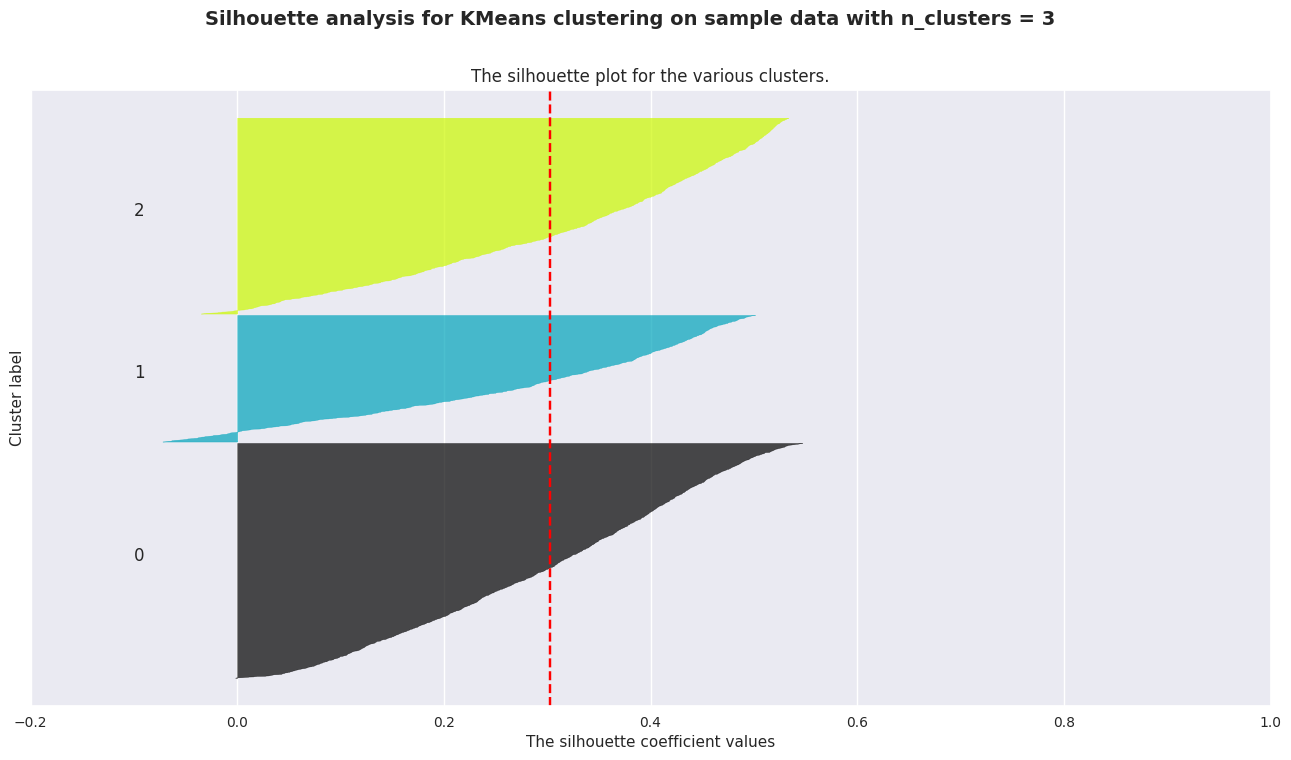

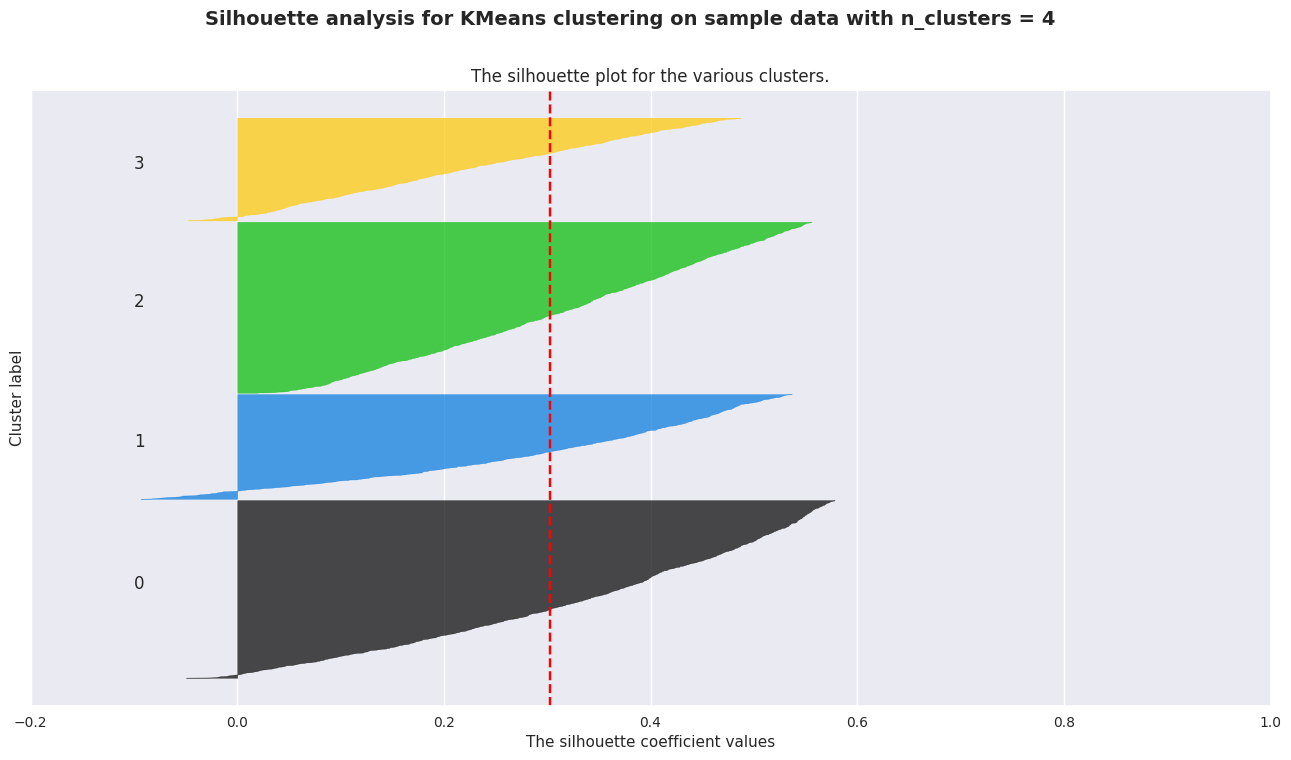

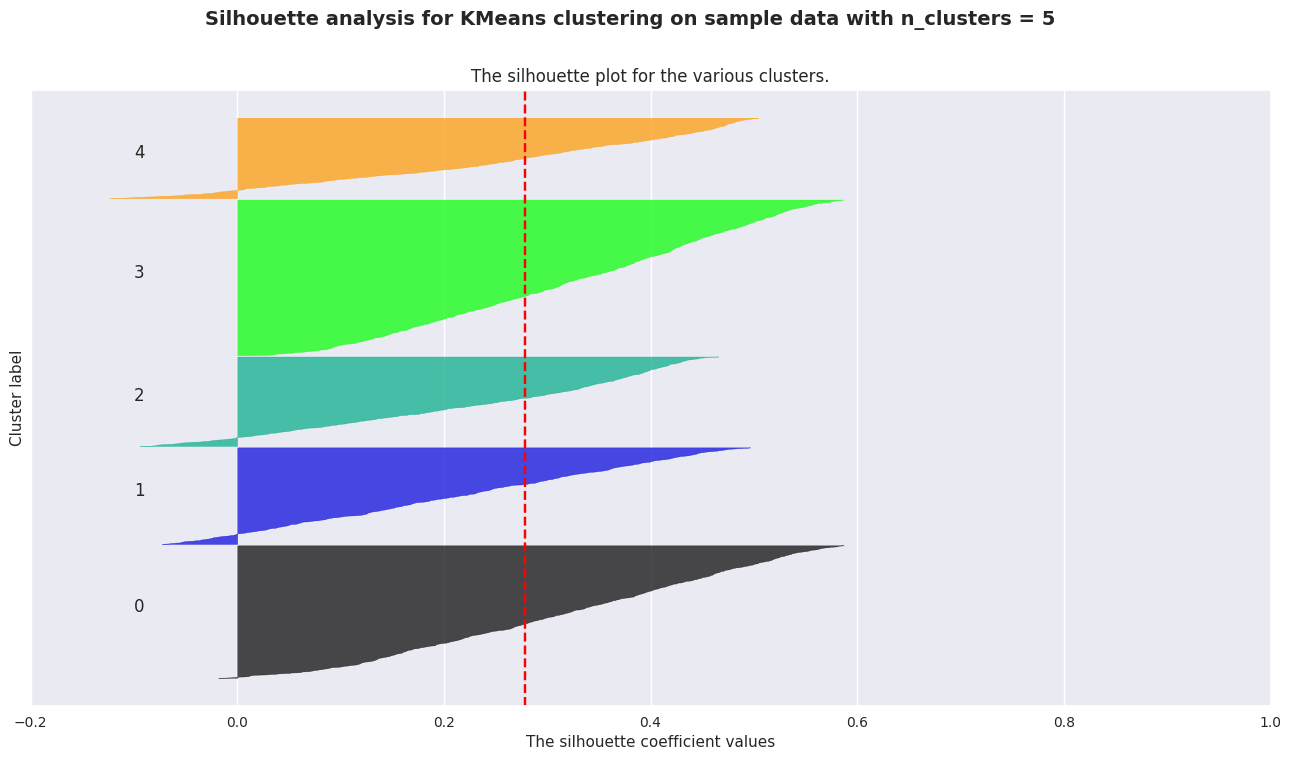

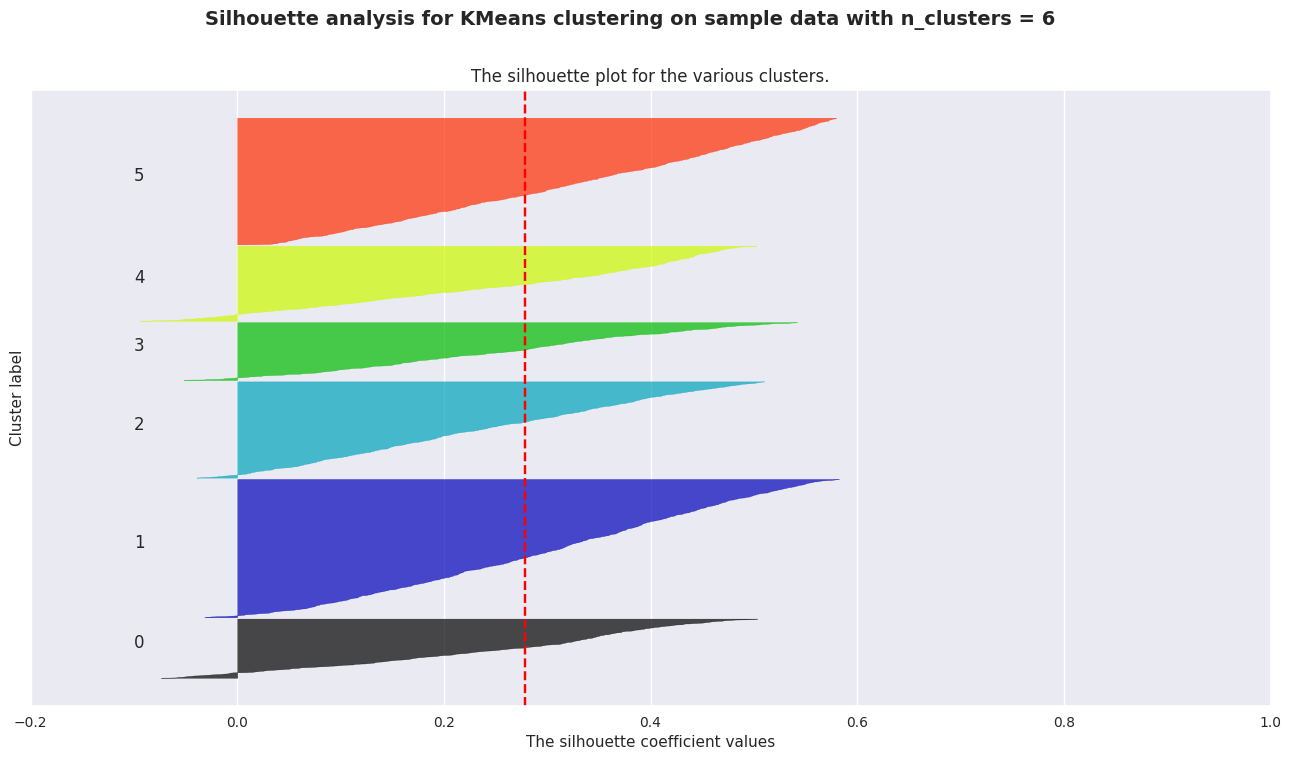

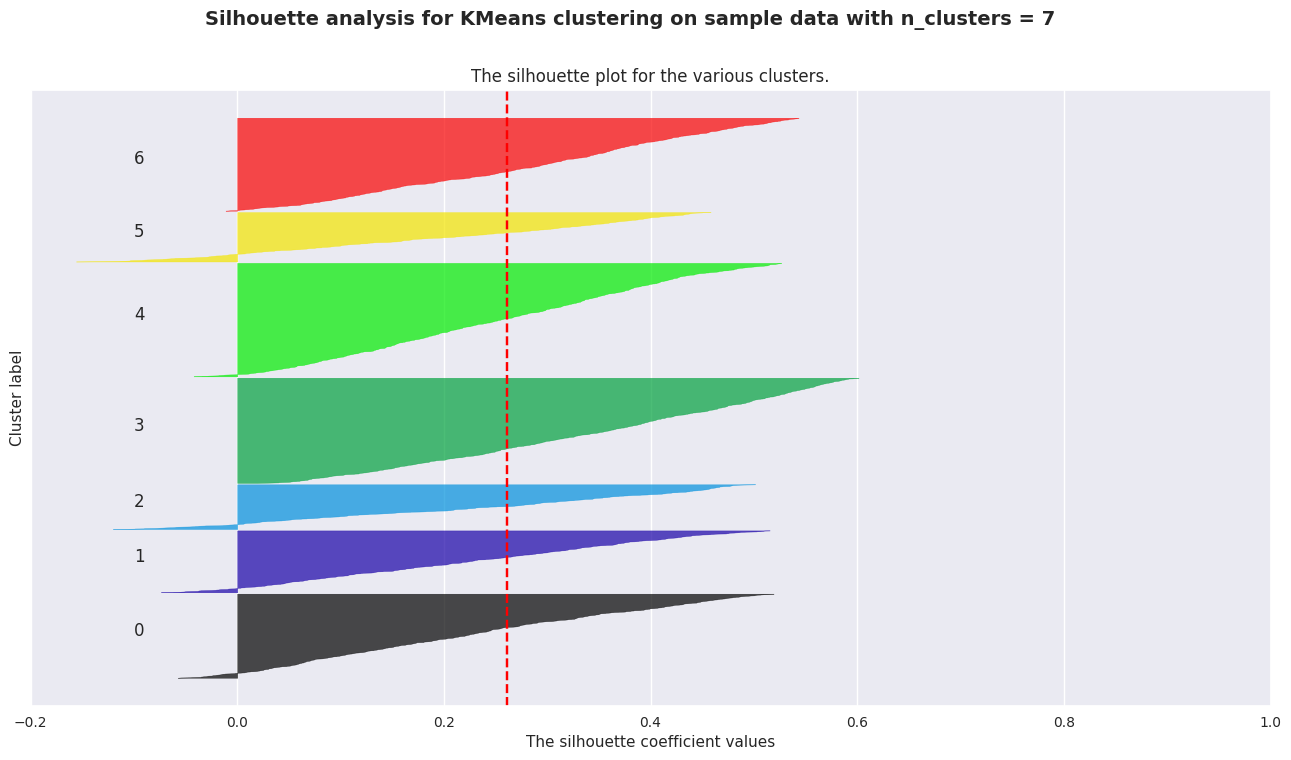

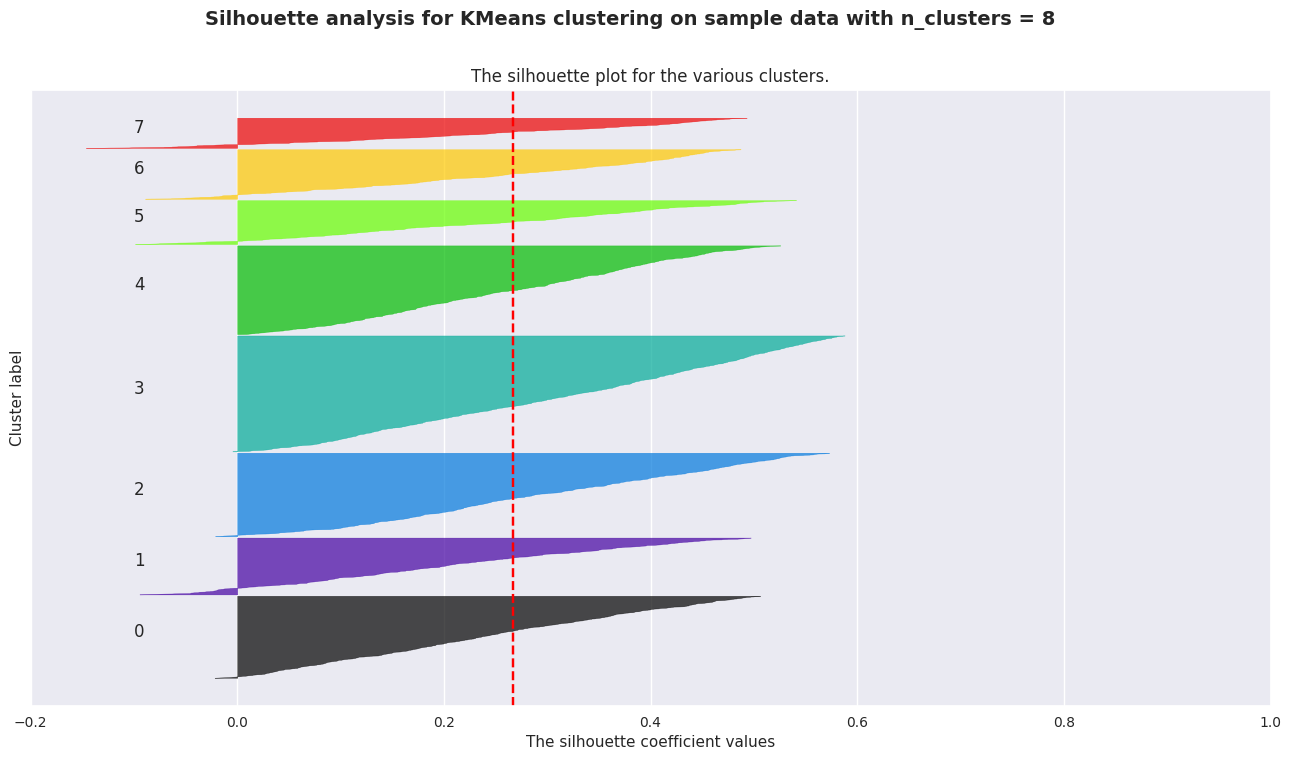

In [94]:
import matplotlib.cm as cm
# make a list of clusters to check
clusters_list = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in clusters_list:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    fig, axis = plt.subplots(figsize=(16,8))

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        axis.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
         # Label the silhouette plots with their cluster numbers at the middle
        axis.text(-0.1, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    axis.set_title("The silhouette plot for the various clusters.")
    axis.set_xlabel("The silhouette coefficient values")
    axis.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axis.axvline(x=silhouette_avg, color="red", linestyle="--")

    axis.set_yticks([])  # Clear the yaxis labels / ticks
    axis.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

#Applying DBSCAN:

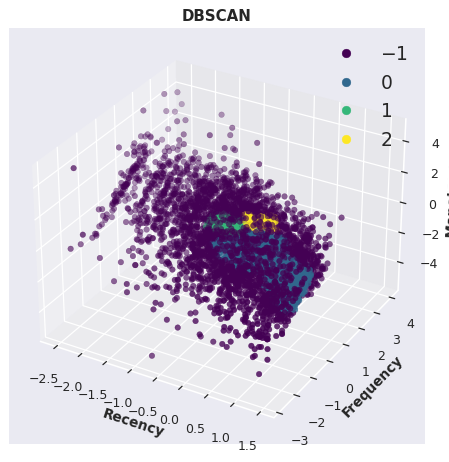

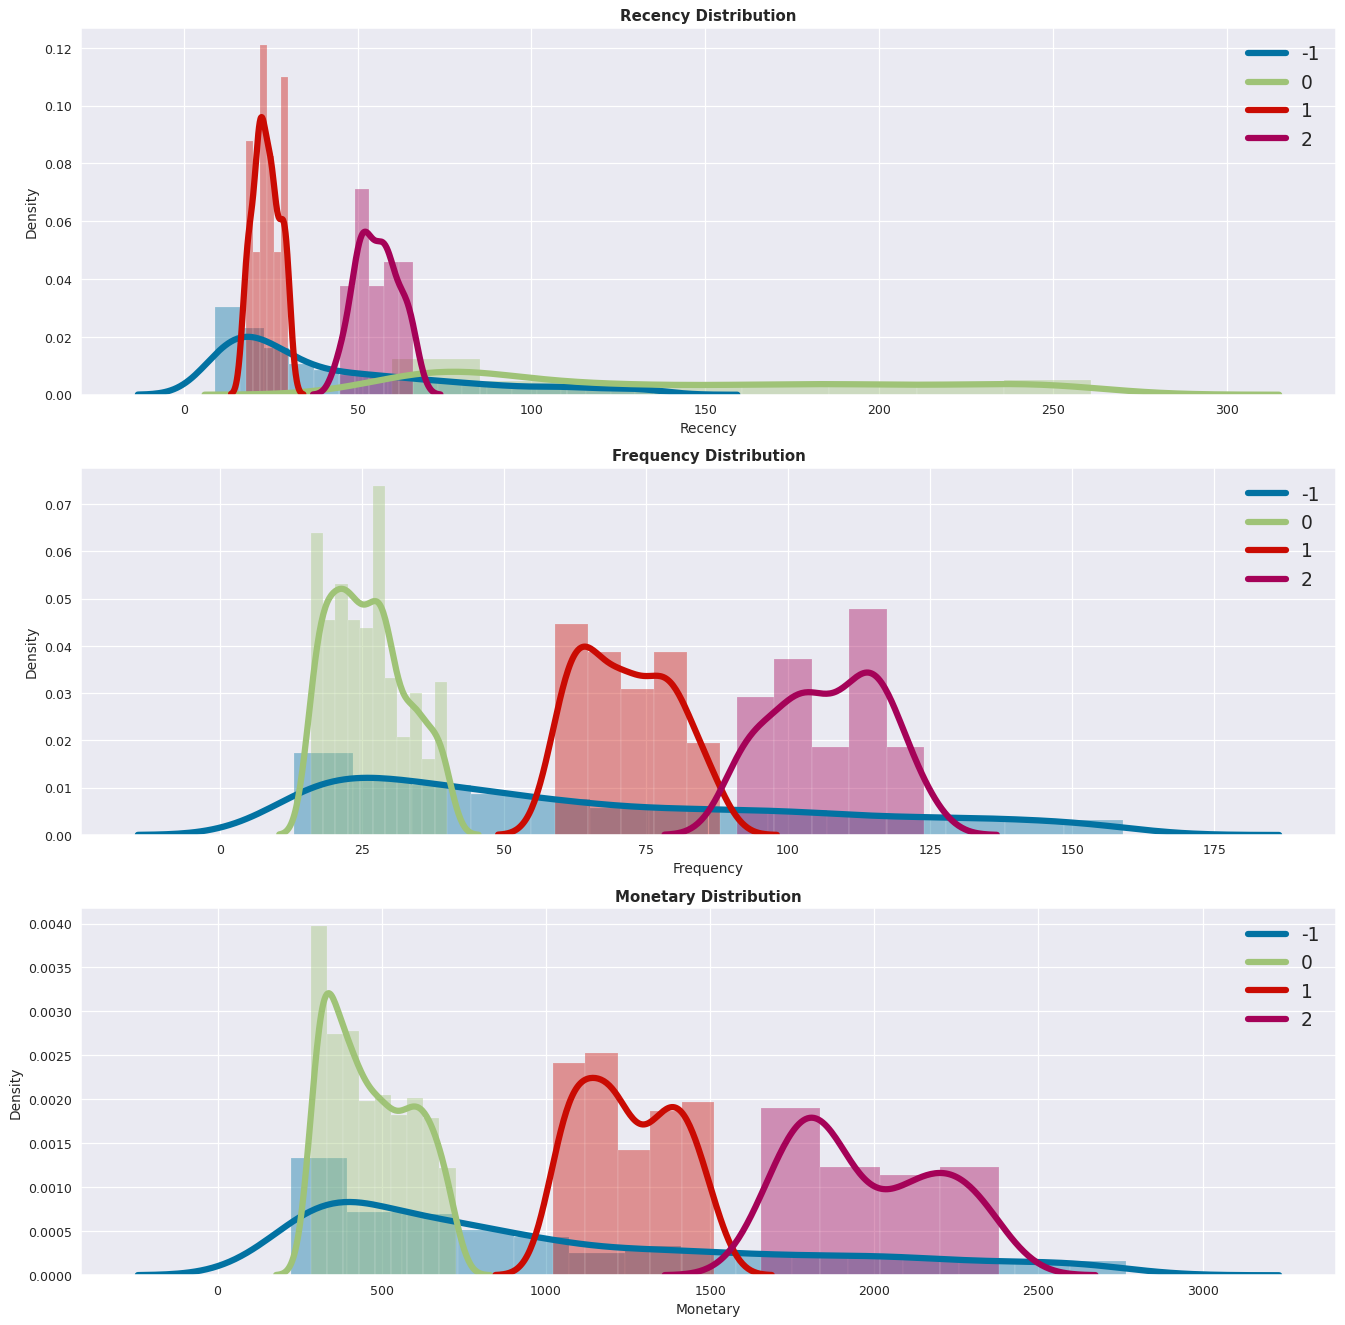



Discriptive Statistics for each segment:



DBSCAN,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
-1,75.317855,31.000000,113.341073,52.000000,2611.324529,788.690000,3058
0,155.414397,127.000000,28.579767,25.000000,515.377824,447.660000,1028
1,24.419355,23.000000,73.754839,71.000000,1274.709613,1226.890000,155
2,56.428571,56.000000,107.295918,107.000000,2026.429592,1887.995000,98




Cluster Discription:



DBSCAN,Last_Transaction,Transaction_frequency,Transaction_Value
-1,11 to 106 days ago,15 to 134 times,280 to 2233 Sterling
0,65 to 245 days ago,17 to 37 times,308 to 661 Sterling
1,18 to 29 days ago,60 to 85 times,1053 to 1457 Sterling
2,46 to 64 days ago,92 to 119 times,1703 to 2305 Sterling


In [95]:
#Instantiating DBSCAN
dbsc = DBSCAN(eps=0.2, min_samples=25)
#Fitting the model
y = dbsc.fit_predict(x)

#Plotting the Results
title = 'DBSCAN'
segment_name = 'DBSCAN'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

In [96]:

from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])

# Add rows K-Means with silhouette_score
myTable.add_row(['1',"Segmentation Using RMF_Score ", "RMF", "4"])
myTable.add_row(['2',"K-Means with Elbow method  ", "RMF", "4"])
myTable.add_row(['3',"K-Means with silhouette_score  ", "RMF", "3"])
myTable.add_row(['4',"DBSCAN ", "RMF", "4"])
print(myTable)

+--------+---------------------------------+------+---------------------------+
| SL No. |            Model_Name           | Data | Optimal_Number_of_cluster |
+--------+---------------------------------+------+---------------------------+
|   1    |  Segmentation Using RMF_Score   | RMF  |             4             |
|   2    |   K-Means with Elbow method     | RMF  |             4             |
|   3    | K-Means with silhouette_score   | RMF  |             3             |
|   4    |             DBSCAN              | RMF  |             4             |
+--------+---------------------------------+------+---------------------------+
